In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

In [2]:
df=pd.read_excel('F:\my project\dataset\\iran_index.xlsx').loc[:,['inf_adj','interest_rate','gdp_naminal','usd/irr','gold_coin','stock_index','housing_price']]

In [3]:
#df

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df2=df[:]

In [6]:
df2

,inf_adj,interest_rate,gdp_naminal,usd/irr,gold_coin,stock_index,housing_price
18,32.646834,1.19,3.166383e+14,444,41273,1917.0,62700.0
22,61.160409,1.17,7.383074e+14,813,60512,3029.0,97300.0
24,78.897662,1.15,1.258129e+15,799,69960,7018.5,177500.0
25,91.205697,1.16,1.637032e+15,832,86150,11318.5,620200.0
26,105.068963,1.14,2.029908e+15,874,104537,11848.0,571800.0
27,115.996136,1.13,2.442212e+15,904,122890,9769.0,673600.0
28,129.799676,1.12,3.247304e+15,922,167967,9769.0,929500.0
29,153.682816,1.12,3.887723e+15,935,190678,10841.5,1615800.0
30,192.718251,1.12,4.107466e+15,966,231649,10336.0,1715800.0
31,213.531823,1.13,5.035812e+15,1000,288000,15428.0,1658900.0


In [7]:
for i in df.columns:
    mean=np.mean(df2[i])
    var=np.std(df2[i])
    df2[i]=(df2[i]-mean)/var

In [8]:
df2

,inf_adj,interest_rate,gdp_naminal,usd/irr,gold_coin,stock_index,housing_price
18,-0.604599,0.567403,-0.531089,-0.599361,-0.502699,-0.531708,-0.539938
22,-0.586755,0.033377,-0.524335,-0.573821,-0.500262,-0.529788,-0.538088
24,-0.575655,-0.500649,-0.516008,-0.574790,-0.499066,-0.522899,-0.533801
25,-0.567953,-0.233636,-0.509939,-0.572506,-0.497015,-0.515474,-0.510138
26,-0.559277,-0.767662,-0.503646,-0.569599,-0.494686,-0.514560,-0.512725
27,-0.552439,-1.034675,-0.497042,-0.567523,-0.492361,-0.518149,-0.507283
28,-0.543801,-1.301688,-0.484146,-0.566277,-0.486651,-0.518149,-0.493605
29,-0.528855,-1.301688,-0.473888,-0.565377,-0.483774,-0.516297,-0.456920
30,-0.504426,-1.301688,-0.470368,-0.563232,-0.478584,-0.517170,-0.451575
31,-0.491401,-1.034675,-0.455498,-0.560878,-0.471446,-0.508378,-0.454616


array([[<Axes: xlabel='inf_adj', ylabel='inf_adj'>,
        <Axes: xlabel='interest_rate', ylabel='inf_adj'>,
        <Axes: xlabel='gdp_naminal', ylabel='inf_adj'>,
        <Axes: xlabel='usd/irr', ylabel='inf_adj'>,
        <Axes: xlabel='gold_coin', ylabel='inf_adj'>,
        <Axes: xlabel='stock_index', ylabel='inf_adj'>,
        <Axes: xlabel='housing_price', ylabel='inf_adj'>],
       [<Axes: xlabel='inf_adj', ylabel='interest_rate'>,
        <Axes: xlabel='interest_rate', ylabel='interest_rate'>,
        <Axes: xlabel='gdp_naminal', ylabel='interest_rate'>,
        <Axes: xlabel='usd/irr', ylabel='interest_rate'>,
        <Axes: xlabel='gold_coin', ylabel='interest_rate'>,
        <Axes: xlabel='stock_index', ylabel='interest_rate'>,
        <Axes: xlabel='housing_price', ylabel='interest_rate'>],
       [<Axes: xlabel='inf_adj', ylabel='gdp_naminal'>,
        <Axes: xlabel='interest_rate', ylabel='gdp_naminal'>,
        <Axes: xlabel='gdp_naminal', ylabel='gdp_naminal'>,
      

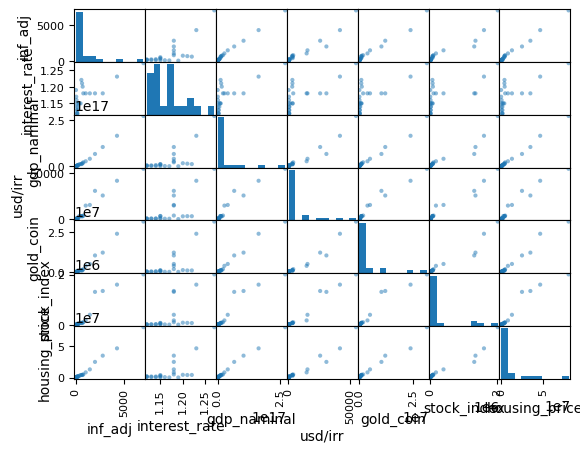

In [9]:
pd.plotting.scatter_matrix(df)

In [10]:
x=df2.drop('housing_price',axis=1).values

In [11]:
y=df2.loc[:,'housing_price'].values

In [12]:
x_test,x_train,y_test,y_train=train_test_split(x,y,train_size=0.1,shuffle=True)

In [13]:
x_train.shape

(22, 6)

In [14]:
model=Sequential()

In [15]:
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_absolute_error')

In [18]:
model.fit(x_train,y_train,batch_size=2,epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 5.1247 - mean_absolute_error: 0.7745
Epoch 2/50
11/11 [==============================] - 0s 3ms/step - loss: 4.9093 - mean_absolute_error: 0.7585
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 4.7230 - mean_absolute_error: 0.7421
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 4.5046 - mean_absolute_error: 0.7245
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 4.3873 - mean_absolute_error: 0.7125
Epoch 6/50
11/11 [==============================] - 0s 3ms/step - loss: 4.1807 - mean_absolute_error: 0.6953
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 4.0355 - mean_absolute_error: 0.6820
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 3.9111 - mean_absolute_error: 0.6695
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 3.7780 - mean_absolute_error: 0.6553
Epoch 10/50
11/11 [

In [19]:
model.predict(x_test)

array([[0.5829718 ],
       [0.18485422]], dtype=float32)

In [20]:
y_test

array([1.32756337, 0.79303409])

In [21]:
model.predict(x_train)

array([[-0.5233    ],
       [-0.595445  ],
       [-0.48791957],
       [-0.2995816 ],
       [ 1.4664302 ],
       [-0.45211554],
       [-0.3448997 ],
       [-0.50198483],
       [ 1.135695  ],
       [-0.59514874],
       [-0.36197597],
       [ 0.39531437],
       [-0.4583755 ],
       [-0.31979182],
       [-0.5618507 ],
       [ 0.10820699],
       [-0.22850075],
       [-0.3933267 ],
       [-0.59058243],
       [-0.4735359 ],
       [-0.10005412],
       [-0.44120353]], dtype=float32)

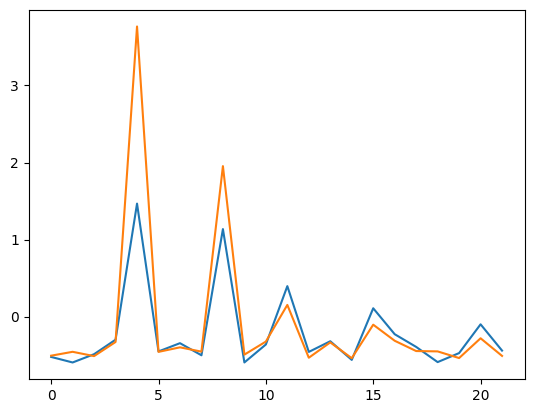

In [22]:
plt.plot(model.predict(x_train))
plt.plot(y_train)

In [23]:
df

,inf_adj,interest_rate,gdp_naminal,usd/irr,gold_coin,stock_index,housing_price
18,32.646834,1.19,3.166383e+14,444,41273,1917.0,62700.0
22,61.160409,1.17,7.383074e+14,813,60512,3029.0,97300.0
24,78.897662,1.15,1.258129e+15,799,69960,7018.5,177500.0
25,91.205697,1.16,1.637032e+15,832,86150,11318.5,620200.0
26,105.068963,1.14,2.029908e+15,874,104537,11848.0,571800.0
27,115.996136,1.13,2.442212e+15,904,122890,9769.0,673600.0
28,129.799676,1.12,3.247304e+15,922,167967,9769.0,929500.0
29,153.682816,1.12,3.887723e+15,935,190678,10841.5,1615800.0
30,192.718251,1.12,4.107466e+15,966,231649,10336.0,1715800.0
31,213.531823,1.13,5.035812e+15,1000,288000,15428.0,1658900.0


In [24]:
x2=df2.drop('stock_index',axis=1).values
y2=df2.loc[:,'stock_index'].values

In [25]:
x2

array([[-0.60459885,  0.56740267, -0.53108893, -0.59936078, -0.50269942,
        -0.5399376 ],
       [-0.58675505,  0.03337663, -0.52433468, -0.57382122, -0.50026235,
        -0.53808813],
       [-0.57565508, -0.50064941, -0.51600825, -0.5747902 , -0.49906554,
        -0.5338012 ],
       [-0.56795271, -0.23363639, -0.50993901, -0.57250617, -0.49701469,
        -0.51013759],
       [-0.55927707, -0.76766243, -0.50364598, -0.56959923, -0.49468554,
        -0.51272471],
       [-0.55243885, -1.03467545, -0.49704173, -0.56752284, -0.4923607 ,
        -0.50728321],
       [-0.54380059, -1.30168847, -0.48414586, -0.56627701, -0.48665063,
        -0.4936046 ],
       [-0.52885452, -1.30168847, -0.4738877 , -0.56537724, -0.48377375,
        -0.45691986],
       [-0.50442614, -1.30168847, -0.47036788, -0.56323164, -0.4785838 ,
        -0.45157457],
       [-0.491401  , -1.03467545, -0.45549773, -0.5608784 , -0.47144561,
        -0.45461604],
       [-0.4748311 , -0.76766243, -0.42570146, -0.

In [26]:
y2

array([-0.53170784, -0.52978769, -0.52289883, -0.51547382, -0.51455951,
       -0.51814941, -0.51814941, -0.51629748, -0.51717035, -0.50837775,
       -0.49449297, -0.48155445, -0.42595921, -0.40911479, -0.42019274,
       -0.40858209, -0.39544844, -0.36282845, -0.23897833,  0.14869295,
        1.72821562,  1.79042603,  2.22777843,  2.93461055])

In [27]:
x_train2,x_test2,y_train2,y_test2=train_test_split(x2,y2,train_size=0.9,shuffle=True)

In [28]:
model2=Sequential([Dense(6,activation='relu',input_shape=(6,)),Dense(1)])

In [29]:
model2.compile(optimizer='adam',loss='mean_squared_error',metrics='mean_absolute_error')

In [30]:
model2.fit(x_train2,y_train2,batch_size=2,epochs=50)

Epoch 1/50
11/11 [==============================] - 1s 3ms/step - loss: 1.6707 - mean_absolute_error: 1.1235
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 1.5542 - mean_absolute_error: 1.0680
Epoch 3/50
11/11 [==============================] - 0s 3ms/step - loss: 1.4501 - mean_absolute_error: 1.0162
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 1.3523 - mean_absolute_error: 0.9639
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 1.2688 - mean_absolute_error: 0.9165
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 1.1995 - mean_absolute_error: 0.8720
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 1.1340 - mean_absolute_error: 0.8324
Epoch 8/50
11/11 [==============================] - 0s 3ms/step - loss: 1.0805 - mean_absolute_error: 0.7939
Epoch 9/50
11/11 [==============================] - 0s 3ms/step - loss: 1.0260 - mean_absolute_error: 0.7584
Epoch 10/50
11/11 [

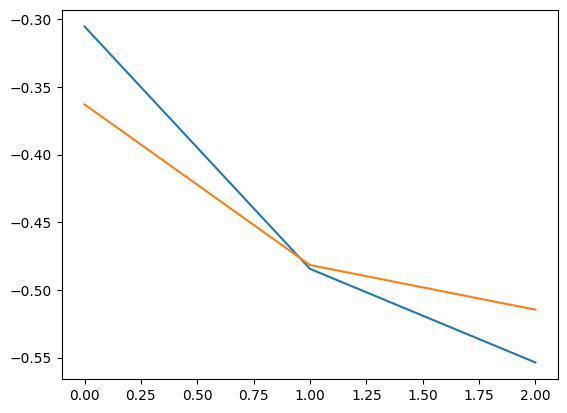

In [31]:
plt.plot(model2.predict(x_test2))
plt.plot(y_test2)

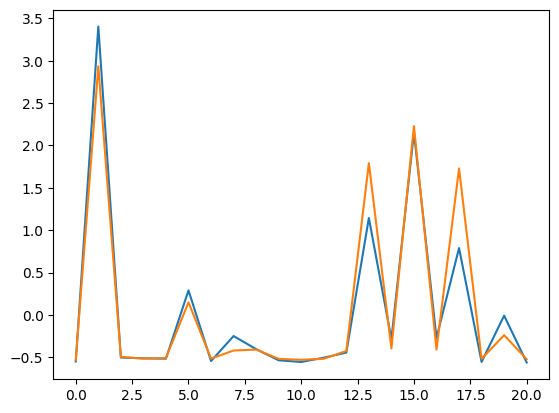

In [32]:
plt.plot(model2.predict(x_train2))
plt.plot(y_train2)

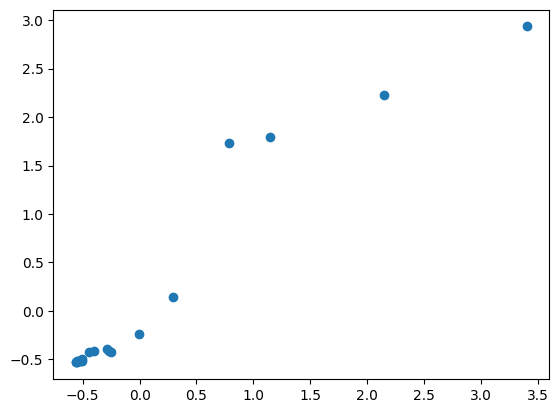

In [33]:
plt.scatter(model2.predict(x_train2),y_train2)

In [34]:
model2.save('stock_index_factor_models.h5')

In [35]:
x2[-1]

array([3.76384611, 2.70350682, 3.81827646, 3.17661906, 3.50129326,
       3.7655514 ])

In [37]:
model2.predict(x2[-1].reshape(1,6))*np.std(df['stock_index'])+np.mean(df['stock_index'])

array([[2281042.5]], dtype=float32)

In [38]:
(model2.predict(x2[-1].reshape(1,6))+0.1507)*np.std(df['stock_index'])+np.mean(df['stock_index'])

array([[2368316.2]], dtype=float32)

In [39]:
(model2.predict(x2[-1].reshape(1,6))-0.1507)*np.std(df['stock_index'])+np.mean(df['stock_index'])

array([[2193768.5]], dtype=float32)